## Imports

In [25]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
from reflax import one_growing_layer, polanalyze

## Setup

In [26]:
# Source Parameters
lam0 = 632.8
theta = jnp.deg2rad(25)
phi = jnp.deg2rad(0)
polstate = "Linear TE/perpendicular/s"
pte, ptm = polanalyze(polstate)

# Device Parameters
ur1 = 1
er1 = 1
v = 747.9 / (7049 / 60) / 60
dt = 7049
urv = 1
erv = 1.57**2
L = jnp.array([24.2, 10.0])
UR = jnp.array([1.0, 1.0])
ER = jnp.array([1.57**2, 1.45704**2])
trn0 = 1
ur2 = 1
er2 = (3.8827 + 0.019626j)**2

## Run

In [27]:
REFtil, TRNtil, CONtil, calt, calL = one_growing_layer(dt, urv, UR, erv, ER, L, v, lam0, theta, phi, pte, ptm, ur1, er1, ur2, er2, trn0)

## Profiling

In [28]:
%timeit REFtil, TRNtil, CONtil, calt, calL = jax.block_until_ready(one_growing_layer(dt, urv, UR, erv, ER, L, v, lam0, theta, phi, pte, ptm, ur1, er1, ur2, er2, trn0))

162 ms ± 64.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Plotting

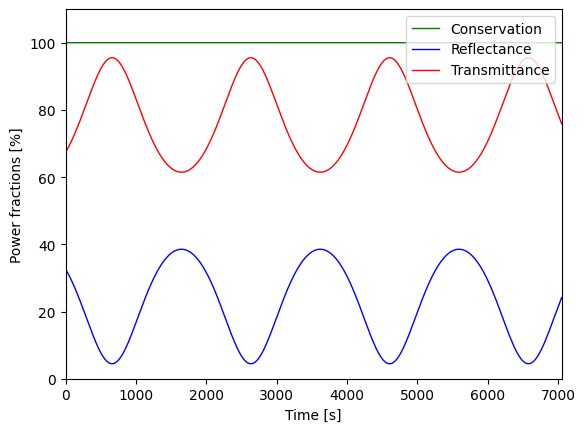

In [29]:
plt.figure()
plt.plot(calt, CONtil * 100, '-g', linewidth=1, label="Conservation")
plt.plot(calt, REFtil * 100, '-b', linewidth=1, label="Reflectance")
plt.plot(calt, TRNtil * 100, '-r', linewidth=1, label="Transmittance")
plt.xlim([0, dt])
plt.ylim([0, 110])
plt.xlabel("Time [s]")
plt.ylabel("Power fractions [%]")
plt.legend(loc="upper right")
plt.savefig("gunni.png")